In [1]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline
from scipy.special import erf

In [ ]:
def gen_int(x, m, s):
    return s*erf(x/(np.sqrt(2)*s))/(2*np.abs(s))

def integral(x1, x2, m, s):
    return gen_int(x2, m, s) - gen_int(x1, m, s)

In [27]:
def test(N=1000, m=0, s=1, L=-5, R=5, num_bins=100):
    bins = np.linspace(L, R, num_bins)
    nums = np.random.normal(m, s, size=N)
    hist, _ = np.histogram(nums, bins=bins)
    return hist

In [110]:
N = 100000
num_bins = 100
L = -5
R = 5
m = 0
s = 1
num_rep = 20
hs = []
for i in range(num_rep):
    hs.append(test(N, m, s, L, R, num_bins))
hs = np.array(hs)
means = np.mean(hs, axis=0)

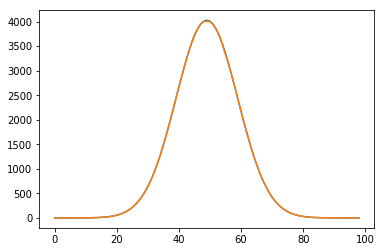

In [111]:
bins = np.linspace(L, R, num_bins)
expected = N * np.array([integral(bins[i], bins[i+1], m, s) for i, _ in enumerate(bins[:-1])])
plt.plot(expected)
plt.plot(means)

In [112]:
k = [0 if (e-np.sqrt(e) <= h <= e+np.sqrt(e)) else 1 for h, e in zip(means,expected)]

In [113]:
np.sum(k)

0